Image Classification Using **LeNet-5 CNN Architecture** with the CIFAR-10 Dataset

In [ ]:
# Step 1: Importing the necessary libraries.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 2: Loading and pre-processing of the CIFAR-10 dataset.
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Step 3: Normalizing pixel values to be between 0 and 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

# Step 4: One-hot encode the labels.
# This step is required to use the loss function "categorical_crossentropy".
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Step 5: Defining the class names for CIFAR-10 images.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Step 6: Visualizing a few training images from the CIFAR-10 dataset.
# plt.figure(figsize=(10, 10))
# for i in range(25):
#     plt.subplot(5, 5, i + 1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i])
#     plt.xlabel(class_names[train_labels[i].argmax()])  # Using argmax to get the label index
# plt.show()

# Step 7: Building the CNN model (LeNet-5 CNN Architecture).
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(32, 32, 3)),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='tanh'),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(120, (5, 5), activation='tanh'),
    layers.Flatten(),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

# Step 8: Printing the model summary.
model.summary()

# Step 9: Compiling the CNN model.
model.compile(optimizer='adam',  # Adam uses a default learning rate of 0.001
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 10: Training the CNN model.
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

# Step 11: Evaluating the performance of the CNN model.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy is: {test_acc}')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

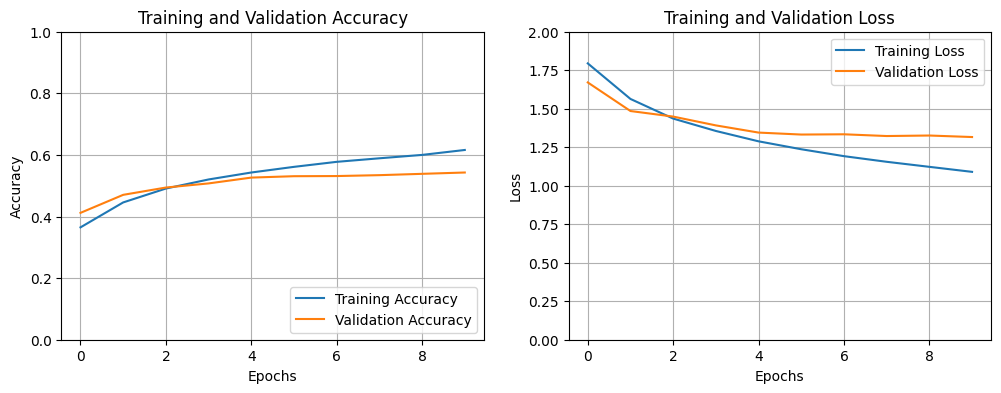

In [ ]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 2])  # Adjusted y-axis limit to better visualize the loss values
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)

plt.show()